In [1]:
# Description : A Death Cross Program

In [54]:
#Import  the libraries
import numpy as np
import pandas as pd
from datetime import datetime
import pandas_datareader as web
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [55]:
stock_start_date ='2016-01-01'
today=datetime.today().strftime('%Y-%m-%d')

In [56]:
def get_my_stock(ticker,start=stock_start_date,end=today):
    data= web.DataReader(ticker,data_source='yahoo',start=start,end=end)
    return data

In [57]:
my_stock=get_my_stock('BTC-USD')
my_stock
#df= df.set-index(pd.DatetimeIndex(df['Date'].values))

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-12-31,432.920990,418.734985,425.875000,430.566986,45996600,430.566986
2016-01-01,436.246002,427.515015,430.721008,434.334015,36278900,434.334015
2016-01-02,436.062012,431.869995,434.622009,433.437988,30096600,433.437988
2016-01-03,433.743011,424.705994,433.578003,430.010986,39633800,430.010986
2016-01-04,434.516998,429.084015,430.061005,433.091003,38477500,433.091003
...,...,...,...,...,...,...
2022-02-04,41527.785156,37093.628906,37149.265625,41500.875000,29412210792,41500.875000
2022-02-05,41847.164062,41038.097656,41501.480469,41441.164062,19652846215,41441.164062
2022-02-06,42500.785156,41244.906250,41441.121094,42412.433594,16142097334,42412.433594


In [58]:
# create a funcetrion to get the Simple Moving Average(SMA)
def SMA(data,period=30, column='Close'):
    return data[column].rolling(window=period).mean()

In [59]:
#Create new columns to store the short term SMA and long term SMA
my_stock['shortSMA']=SMA(my_stock,50)
my_stock['LongSMA'] = SMA(my_stock,200)

In [60]:
my_stock[:200]

,High,Low,Open,Close,Volume,Adj Close,shortSMA,LongSMA
Date,,,,,,,,
2015-12-31,432.920990,418.734985,425.875000,430.566986,45996600,430.566986,NaN,NaN
2016-01-01,436.246002,427.515015,430.721008,434.334015,36278900,434.334015,NaN,NaN
2016-01-02,436.062012,431.869995,434.622009,433.437988,30096600,433.437988,NaN,NaN
2016-01-03,433.743011,424.705994,433.578003,430.010986,39633800,430.010986,NaN,NaN
2016-01-04,434.516998,429.084015,430.061005,433.091003,38477500,433.091003,NaN,NaN
...,...,...,...,...,...,...,...,...
2016-07-13,668.700012,654.468018,664.796997,654.468018,131449000,654.468018,628.568138,NaN
2016-07-14,662.901978,652.922974,652.922974,658.078003,98511400,658.078003,632.737718,NaN
2016-07-15,667.077026,659.039978,659.171021,663.255005,81673104,663.255005,636.935138,NaN


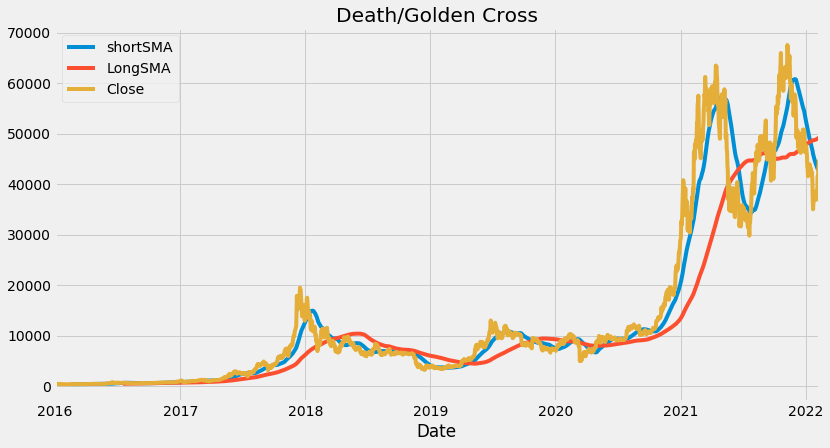

In [61]:
column_list=['shortSMA','LongSMA','Close']
my_stock[column_list].plot(figsize=(12.2,6.4))
plt.title('Death/Golden Cross')
plt.show()

In [95]:
#Create a function to see the dates of each death cross and  golden cross within the data set
def death_golden_cross():
    first_cross = 0
    #loop through then length of the data set
    for i in range(0,len(my_stock)):
        if my_stock['shortSMA'][i] < my_stock['LongSMA'][i] and first_cross == 0:
            print('Death cross on day',my_stock.index[i],':expect price to continue tp fall')
            first_cross = 1
        elif my_stock['shortSMA'][i] > my_stock['LongSMA'][i] and first_cross == 1:
            print('Golden cross on day', my_stock.index[i],':expectt price to continue to rise')
            first_cross=0  

In [96]:
#Show the dates of each death cross and golden cross
death_golden_cross()

Death cross on day 2018-03-30 00:00:00 :expect price to continue tp fall
Golden cross on day 2019-04-24 00:00:00 :expectt price to continue to rise
Death cross on day 2019-10-26 00:00:00 :expect price to continue tp fall
Golden cross on day 2020-02-19 00:00:00 :expectt price to continue to rise
Death cross on day 2020-03-25 00:00:00 :expect price to continue tp fall
Golden cross on day 2020-05-21 00:00:00 :expectt price to continue to rise
Death cross on day 2021-06-19 00:00:00 :expect price to continue tp fall
Golden cross on day 2021-09-15 00:00:00 :expectt price to continue to rise
Death cross on day 2022-01-14 00:00:00 :expect price to continue tp fall
